In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv('Loan_status_2007-2020Q3.gzip.zip', low_memory=False)

In [4]:
raw_data.shape

(2925493, 142)

In [5]:
raw_data['year'] = pd.to_datetime(raw_data['issue_d']).dt.year

In [6]:
raw_data.shape

(2925493, 143)

In [7]:
raw_data = raw_data[raw_data['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

In [8]:
raw_data.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,year
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011.0
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011.0
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011.0
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011.0
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011.0


In [9]:
raw_data['loan_status'].value_counts()

Fully Paid     1497783
Charged Off     362548
Default            433
Name: loan_status, dtype: int64

In [10]:
raw_data['year'].value_counts().sort_index()

2007.0       251
2008.0      1562
2009.0      4716
2010.0     11536
2011.0     21721
2012.0     53367
2013.0    134814
2014.0    235619
2015.0    402837
2016.0    403104
2017.0    314368
2018.0    197178
2019.0     75405
2020.0      4286
Name: year, dtype: int64

In [11]:
df1 = raw_data

In [12]:
df1.shape

(1860764, 143)

In [13]:
df1['year'].value_counts().sort_index()

2007.0       251
2008.0      1562
2009.0      4716
2010.0     11536
2011.0     21721
2012.0     53367
2013.0    134814
2014.0    235619
2015.0    402837
2016.0    403104
2017.0    314368
2018.0    197178
2019.0     75405
2020.0      4286
Name: year, dtype: int64

In [14]:
df1['year'].astype('int')
df2 = df1

In [15]:
df2.shape

(1860764, 143)

In [16]:
df2['year'].value_counts().sort_index()

2007.0       251
2008.0      1562
2009.0      4716
2010.0     11536
2011.0     21721
2012.0     53367
2013.0    134814
2014.0    235619
2015.0    402837
2016.0    403104
2017.0    314368
2018.0    197178
2019.0     75405
2020.0      4286
Name: year, dtype: int64

In [17]:
do_usuniecia = [2007,2008,2009]

In [18]:
df3 = df2[df2.year.isin(do_usuniecia) == False]

In [19]:
df3['year'].value_counts().sort_index()

2010.0     11536
2011.0     21721
2012.0     53367
2013.0    134814
2014.0    235619
2015.0    402837
2016.0    403104
2017.0    314368
2018.0    197178
2019.0     75405
2020.0      4286
Name: year, dtype: int64

In [20]:
df3.shape

(1854235, 143)

In [21]:
df3.head(3)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,year
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011.0
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011.0
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011.0


In [22]:
#df3.to_csv('loan_gotowe2010_2015.csv', index=False)

In [23]:
df = df3

In [24]:
df.shape

(1854235, 143)

In [25]:
#interesują nas jedynie statusy 'Fully Paid' oraz 'Charged Off'
df1 = df[(df['loan_status'] == "Fully Paid") | (df['loan_status'] == "Charged Off")]

In [26]:
df1['loan_status'].value_counts()

Fully Paid     1492140
Charged Off     361662
Name: loan_status, dtype: int64

In [27]:
#sprawdzenie czy występują kolumny gdzie brakuje wartości
df1.isna().sum()

Unnamed: 0                                          0
id                                                  0
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
                                               ...   
orig_projected_additional_accrued_interest    1834589
hardship_payoff_balance_amount                1831753
hardship_last_payment_amount                  1831753
debt_settlement_flag                                0
year                                                0
Length: 143, dtype: int64

In [28]:
#procentowy udział wierszy w których brakuje wartości w kolumnie
df2 = round(100*(df1.isna().sum()/len(df1.id)), 2)
df2.loc[df2 > 0]

emp_title                                      7.07
emp_length                                     6.32
title                                          1.15
dti                                            0.06
mths_since_last_delinq                        50.78
                                              ...  
hardship_dpd                                  99.32
hardship_loan_status                          99.32
orig_projected_additional_accrued_interest    98.96
hardship_payoff_balance_amount                98.81
hardship_last_payment_amount                  98.81
Length: 90, dtype: float64

In [29]:
#są kolumny gdzie większości danych brakuje (80%) i do usunięcia
df1_puste = list(df2[df2 >= 80].index)
len(df1_puste)

31

In [30]:
#usunięcie kolumn gdzie brakuje wartości w wierszach wg wskazanego progu
df2 = df1.drop(df1_puste,axis=1)

In [31]:
df2.shape

(1853802, 112)

In [32]:
#w kolejnym kroku wylistujemy kolumny wraz z liczbą unikalnych wartości
df2.nunique()

Unnamed: 0                     418256
id                            1853802
loan_amnt                        1561
funded_amnt                      1561
funded_amnt_inv                  5951
                               ...   
total_bc_limit                  18841
total_il_high_credit_limit     182112
hardship_flag                       2
debt_settlement_flag                2
year                               11
Length: 112, dtype: int64

In [33]:
#kolumny gdzie występuje tylko jedna unikalna wartość, trzeba się ich pozbyć
df_unikalne = df2.nunique()
df_unikalne = list(df_unikalne[df_unikalne == 1].index)
df_unikalne

['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code']

In [34]:
#usuwamy kolumny z listy powyżej
df3 = df2.drop(columns = df_unikalne)
df3.shape

(1853802, 108)

In [35]:
df3.keys()

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'debt_settlement_flag',
       'year'],
      dtype='object', length=108)

In [36]:
#wyświetlanie wszystkich wierszy i kolumn
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

#pełna zawartość komórki
# pd.set_option('display.max_colwidth', None)

# pd.reset_option('max_columns') - żeby przywrócić domyślne

In [37]:
#załadowanie źródła z opisami kolumn
df_desc = pd.read_excel('LCDataDictionary.xlsx')

In [38]:
df_desc = df_desc.dropna(axis='columns', how='all')
df_desc

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


In [39]:
#lista kolumn do usunięcia
df_del = ['id', 'zip_code', 'addr_state', 'url', 'sub_grade', 'title', 'emp_title', 'issue_d', 'total_pymnt', 
               'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
               'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 
               'funded_amnt_inv', 'debt_settlement_flag', 'last_fico_range_high', 'last_fico_range_low', 'Unnamed: 0']

In [40]:
df3.shape

(1853802, 108)

In [41]:
df4 = df3.drop(df_del, axis = 1)
df4.shape

(1853802, 85)

In [42]:
df4['int_rate'] = df4['int_rate'].str.rstrip('%').astype('float')

In [43]:
df4.keys()

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_

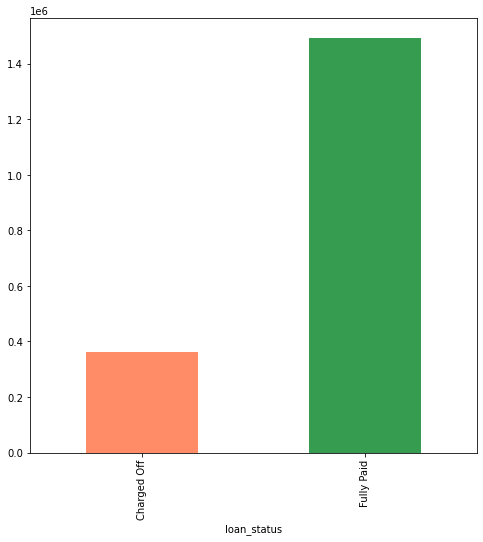

In [44]:
#na start sprawdźmy rozkład w kolumnie loan_status, którą obierzemy jako target
plt.figure(figsize=(8,8))
ax = df4.groupby('loan_status').loan_amnt.count().plot.bar(color=['#ff8c66', '#369c50'])
plt.show()

In [45]:
df4.loan_status.value_counts(normalize = True).round(2)

Fully Paid     0.8
Charged Off    0.2
Name: loan_status, dtype: float64

In [46]:
#zobaczmy teraz jak rozkladają się wartości w poszczególnych kolumnach numerycznych
df4.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1853802.0,14605.64,8974.59,1000.00,8000.00,12000.00,20000.00,4.000000e+04
funded_amnt,1853802.0,14600.13,8971.72,1000.00,8000.00,12000.00,20000.00,4.000000e+04
int_rate,1853802.0,13.17,4.83,5.31,9.49,12.69,15.99,3.099000e+01
installment,1853802.0,440.69,267.01,4.93,247.22,373.95,585.43,1.719830e+03
annual_inc,1853802.0,77404.16,117969.44,0.00,46000.00,65000.00,92000.00,1.100000e+08
...,...,...,...,...,...,...,...,...
tot_hi_cred_lim,1792804.0,177181.08,180533.00,0.00,50400.00,114098.50,256179.00,9.999999e+06
total_bal_ex_mort,1813050.0,50474.43,49036.23,0.00,20861.00,37615.00,63620.00,3.408095e+06
total_bc_limit,1813050.0,22540.80,22511.48,0.00,8000.00,15800.00,29400.00,1.569000e+06
total_il_high_credit_limit,1792804.0,43202.36,44380.71,0.00,15000.00,32399.00,58051.00,2.101913e+06


array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'fico_range_low'}>,
        <AxesSubplot:title={'center':'fico_range_high'}>],
       [<AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'mths_since_last_delinq'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'collections_12_mths_ex_med'}>,
        <AxesSubplot:title={'center':'mths_since_last_major_derog'}>,
        <AxesSubplot:title={'center':'acc_now_delinq'}

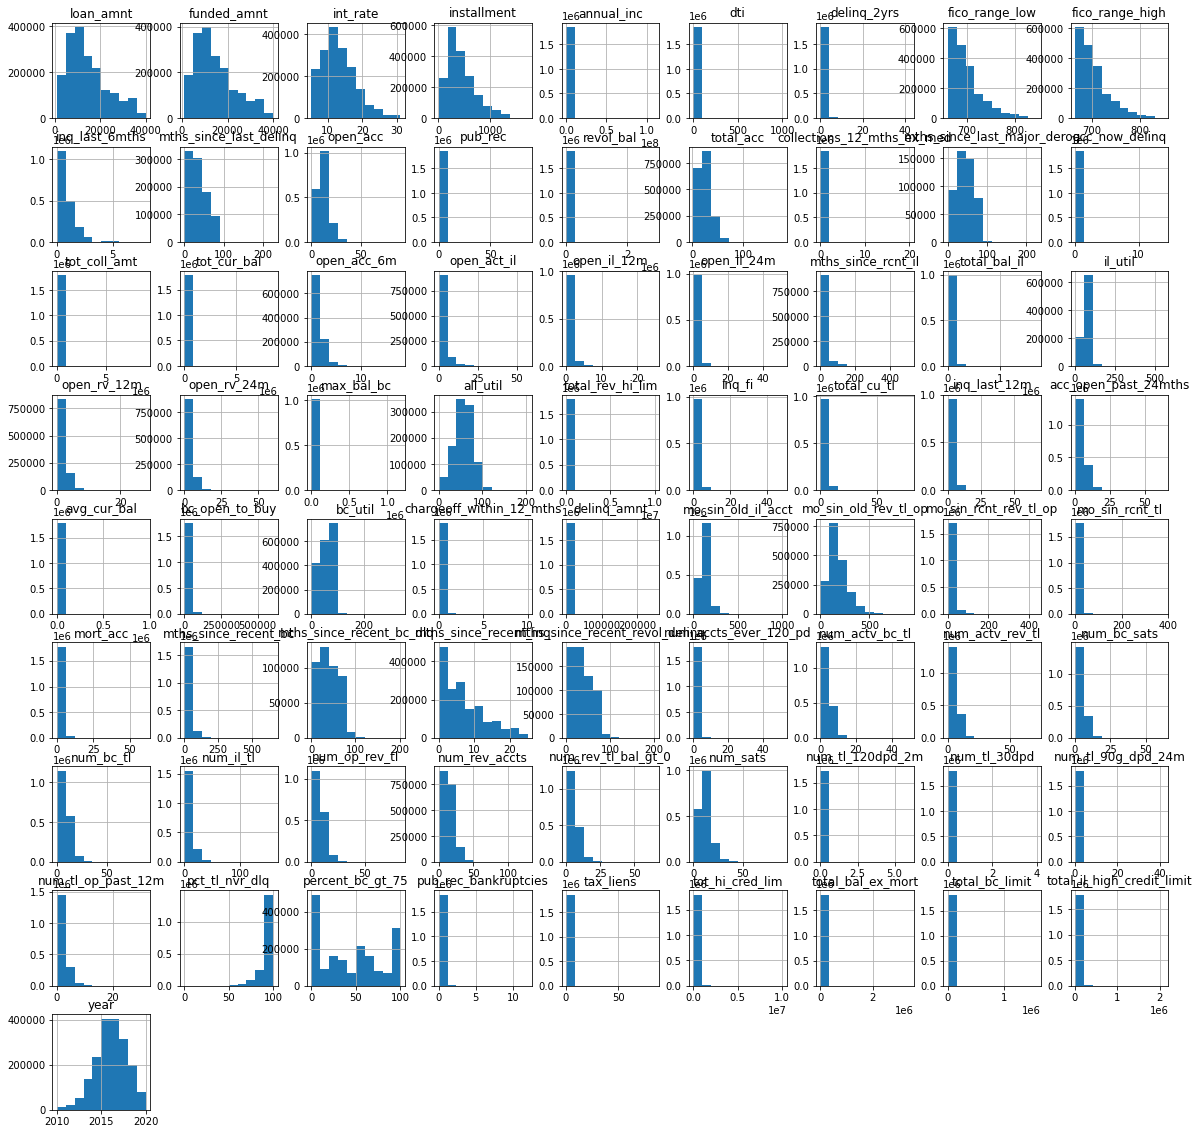

In [47]:
#histogram z rozkładem dla wszystkich kolumn numerycznych
df4.hist(figsize=(20,20))

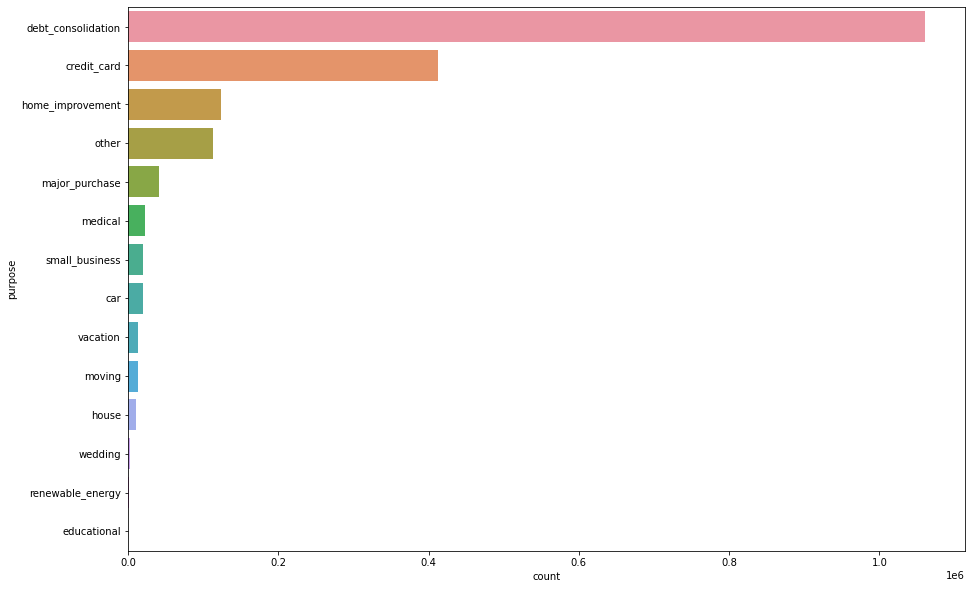

In [48]:
#cel pożyczki
plt.figure(figsize=(15,10))
ax = sns.countplot(y="purpose", data=df4, order=df4['purpose'].value_counts().index,
                   dodge=False)

In [49]:
#usuwanie pustych dti
dti_puste = df4[~df4['dti'].isnull()]

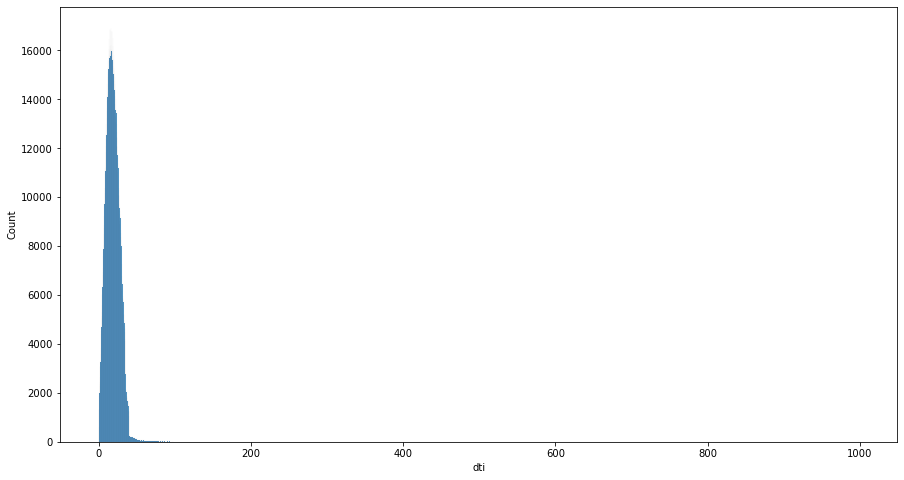

In [50]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(x="dti", data=dti_puste)

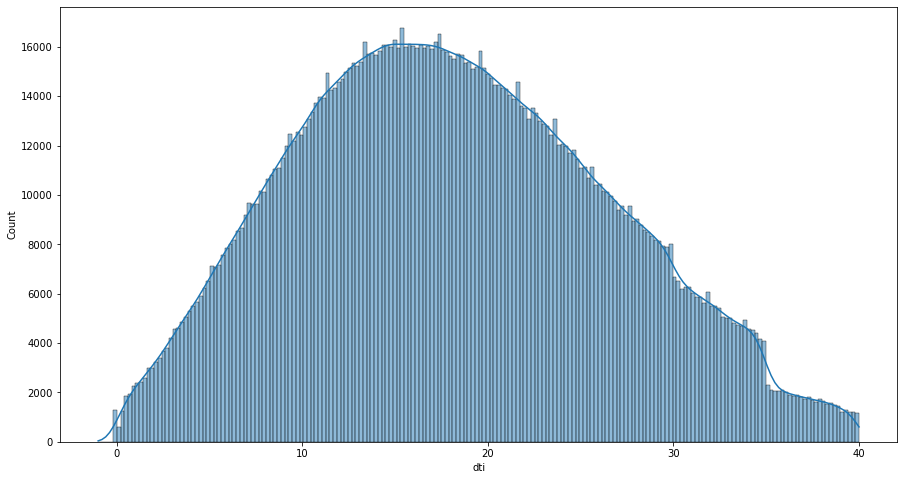

In [51]:
#dla dti poniżej 40 (wskaźnik poziomu zadłużenia względem dochodu)
plt.figure(figsize=(15, 8))
ax = sns.histplot(x="dti", kde=True, data=dti_puste[dti_puste.dti <= 40])

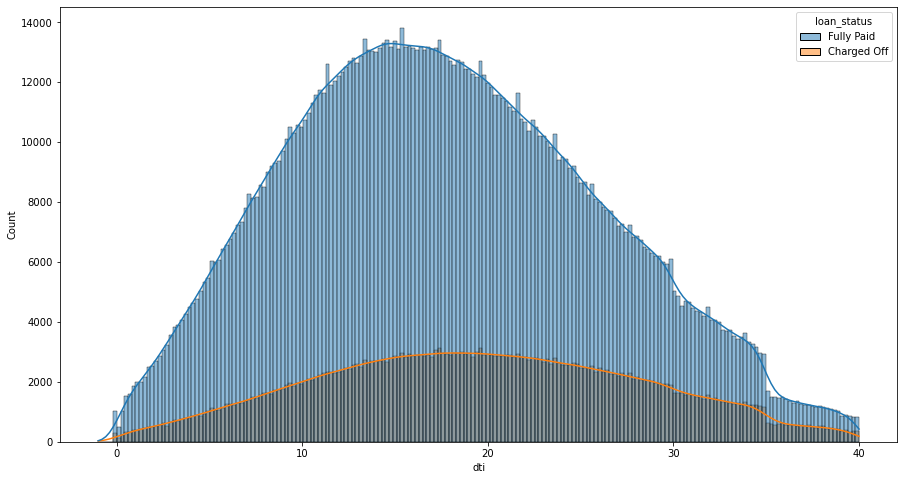

In [52]:
#dla dti poniżej 40 (wskaźnik poziomu zadłużenia względem dochodu)
plt.figure(figsize=(15, 8))
ax = sns.histplot(x="dti", kde=True, hue="loan_status", data=dti_puste[dti_puste.dti <= 40])

[Text(0.5, 1.0, 'rozkład pożyczek w poszczególnych latach (bez 2020, bo dane tylko do q3)')]

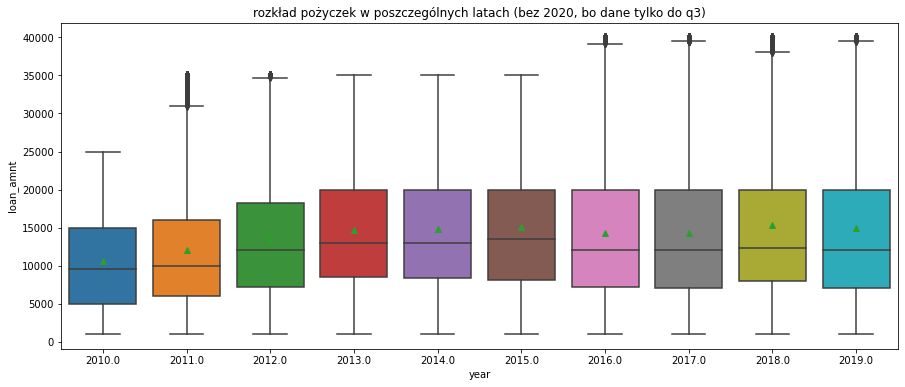

In [53]:
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="year", y="loan_amnt", data=df4[df4['year'] != 2020], showmeans=True)
ax.set(title="rozkład pożyczek w poszczególnych latach (bez 2020, bo dane tylko do q3)")

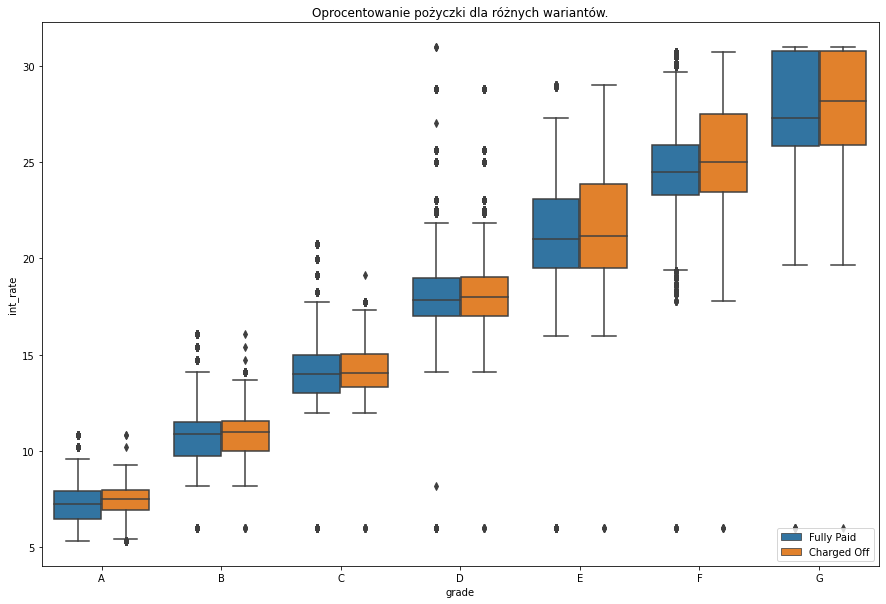

In [54]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x="grade", y="int_rate", hue="loan_status", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                 data=df4)
ax.set(title="Oprocentowanie pożyczki dla różnych wariantów.")
plt.legend(loc='lower right')

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, '# of Loans'),
 Text(0.5, 1.0, 'Poziomy spłaty względem rankingu')]

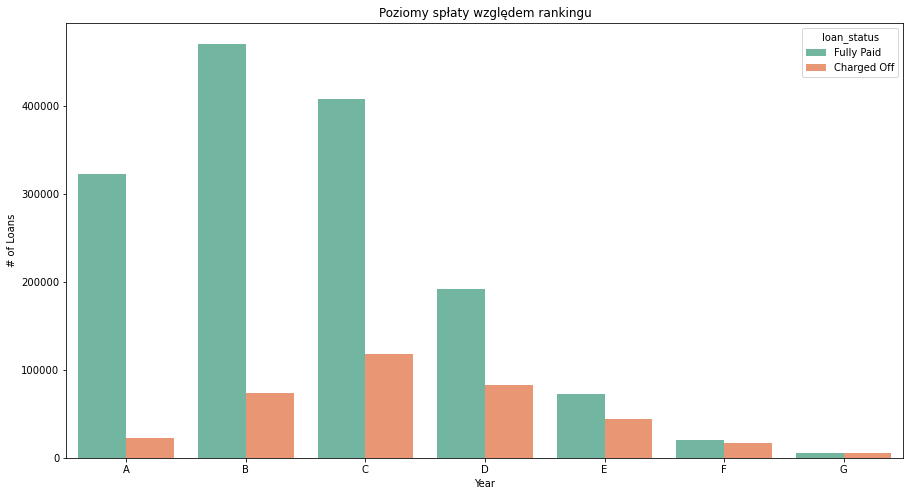

In [55]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="grade", hue="loan_status", data=df4, palette="Set2",
                   order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
ax.set(xlabel='Year', ylabel='# of Loans',
       title="Poziomy spłaty względem rankingu")

[Text(0.5, 1.0, 'Oprocentowanie, a spłata pożyczki.')]

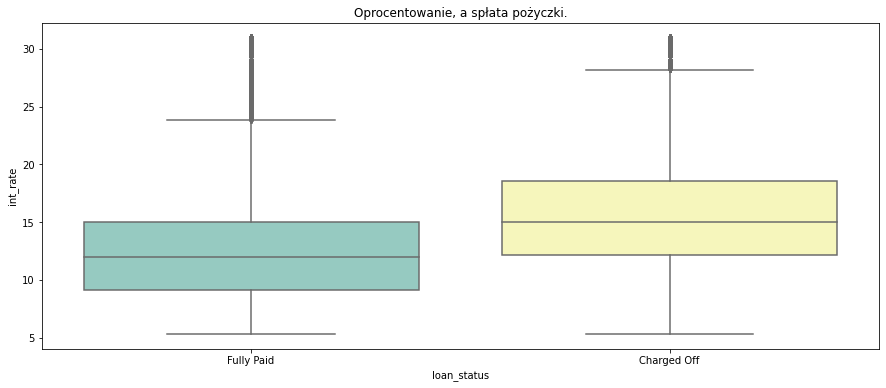

In [56]:
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="loan_status", y="int_rate", palette="Set3", data=df4)
ax.set(title="Oprocentowanie, a spłata pożyczki.")

<AxesSubplot:xlabel='funded_amnt', ylabel='Count'>

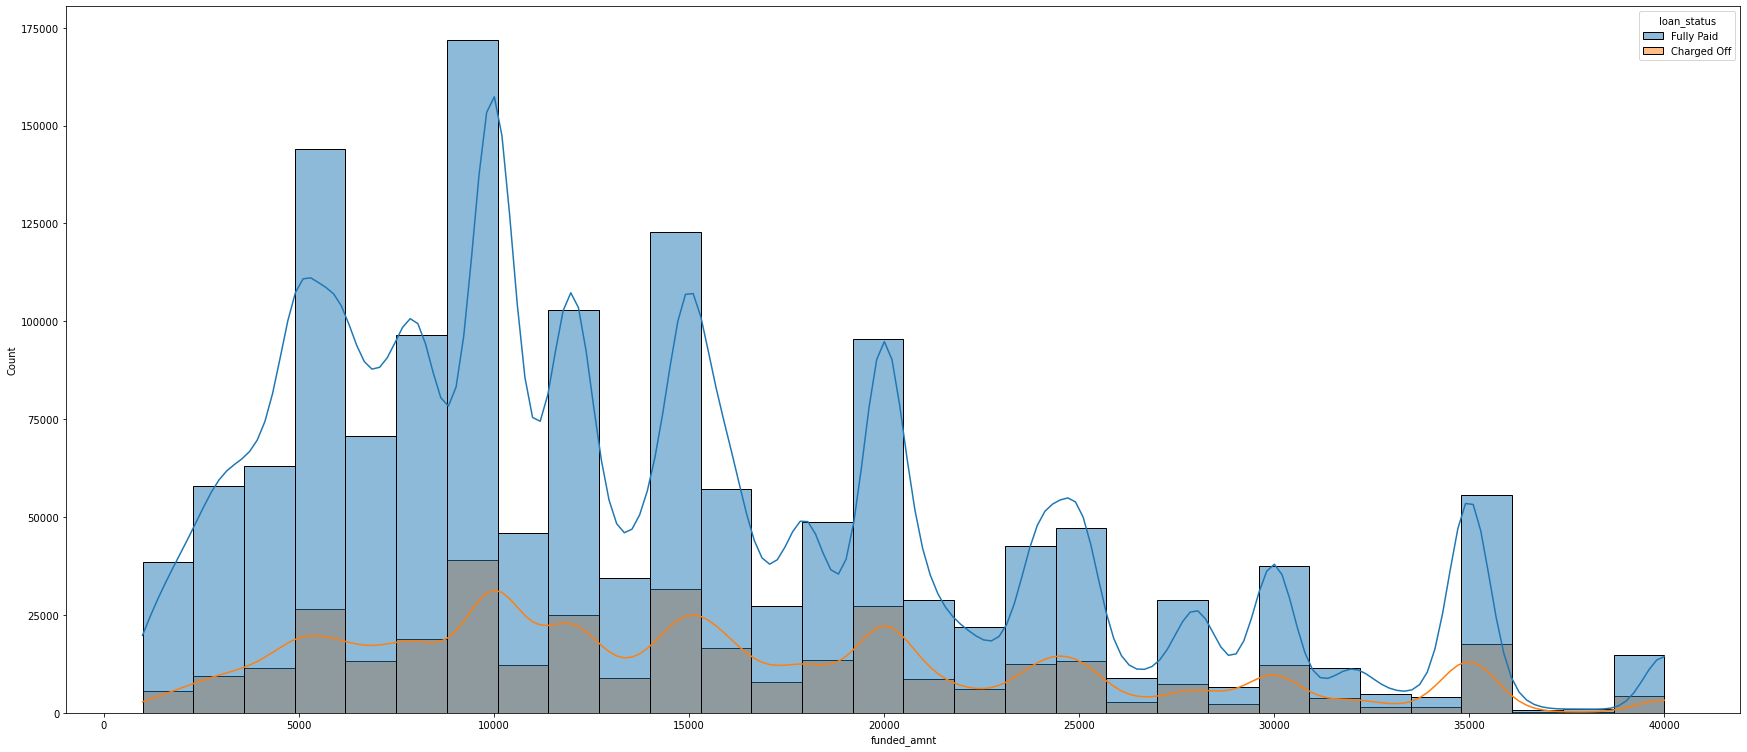

In [57]:
plt.figure(figsize=(30, 13))
sns.histplot(data=df4, x="funded_amnt", bins=30, kde=True, hue="loan_status")

In [58]:
#rozkład procentowy pożyczek z pespektywy stażu pracy
df_fund = df4.groupby('funded_amnt')['loan_status'].value_counts(normalize=True)
df_fund = df_fund.mul(100)
df_fund = df_fund.rename('percent').reset_index()
df_fund.round(2).sort_values('percent').reset_index()

,index,funded_amnt,loan_status,percent
0,43,1525.0,Charged Off,2.63
1,39,1475.0,Charged Off,2.63
2,7,1075.0,Charged Off,4.17
3,3051,39500.0,Charged Off,5.41
4,2791,35950.0,Charged Off,5.56
...,...,...,...,...
3083,2914,37600.0,Fully Paid,100.00
3084,3010,38975.0,Fully Paid,100.00
3085,3061,39650.0,Fully Paid,100.00
3086,2767,35625.0,Fully Paid,100.00


<AxesSubplot:xlabel='funded_amnt'>

<Figure size 2664x1800 with 0 Axes>

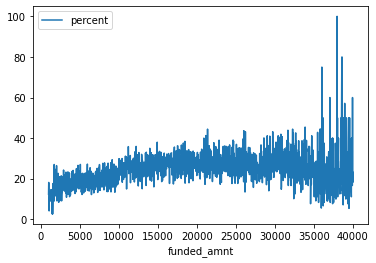

In [59]:
#wykres ukazujący procentowy udział pożyczek, które nie zostały spłacone względem wnioskowanej kwoty
plt.figure(figsize=(37, 25))
df_fund.loc[df_fund['loan_status'] == "Charged Off"].plot(x='funded_amnt', y='percent')

In [60]:
df_fund.loc[df_fund['loan_status'] == "Charged Off"].describe().round(2)

,funded_amnt,percent
count,1528.00,1528.00
mean,20129.61,24.96
std,11099.64,7.76
min,1000.00,2.63
25%,10543.75,20.18
50%,20087.50,25.00
75%,29631.25,29.02
max,40000.00,100.00


In [61]:
df_fund.loc[df_fund['loan_status'] == "Fully Paid"].describe().round(2)

,funded_amnt,percent
count,1560.00,1560.00
mean,20488.80,75.62
std,11264.07,8.26
min,1000.00,20.00
25%,10743.75,71.05
50%,20487.50,75.18
75%,30231.25,80.00
max,40000.00,100.00


<AxesSubplot:xlabel='term', ylabel='count'>

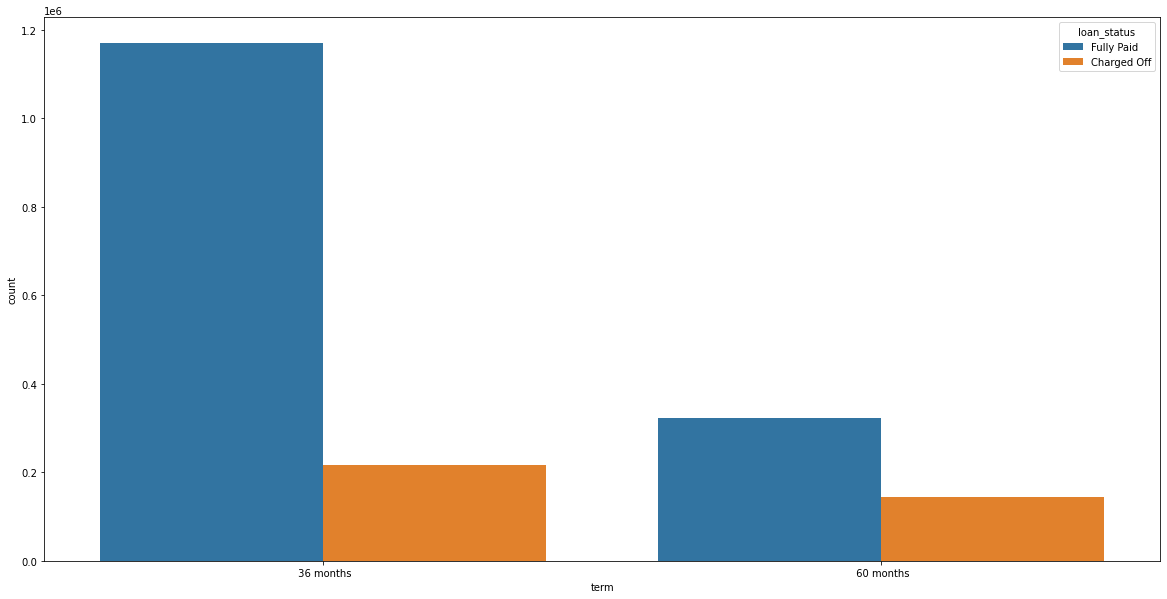

In [62]:
plt.figure(figsize=(20, 10))
sns.countplot(x='term', data=df4, hue='loan_status')

In [63]:
#rozkład procentowy pożyczek z pespektywy czasu
df_term = df4.groupby('term')['loan_status'].value_counts(normalize=True)
df_term = df_term.mul(100)
df_term.round(2)

term        loan_status
 36 months  Fully Paid     84.37
            Charged Off    15.63
 60 months  Fully Paid     68.98
            Charged Off    31.02
Name: loan_status, dtype: float64

In [64]:
#wyniki fico
df4['fico_range_low'] = df4['fico_range_low'].astype('int64')
df4['fico_range_high'] = df4['fico_range_high'].astype('int64')
df4.head(2)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,year
0,5000.0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,2011.0
1,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,2011.0


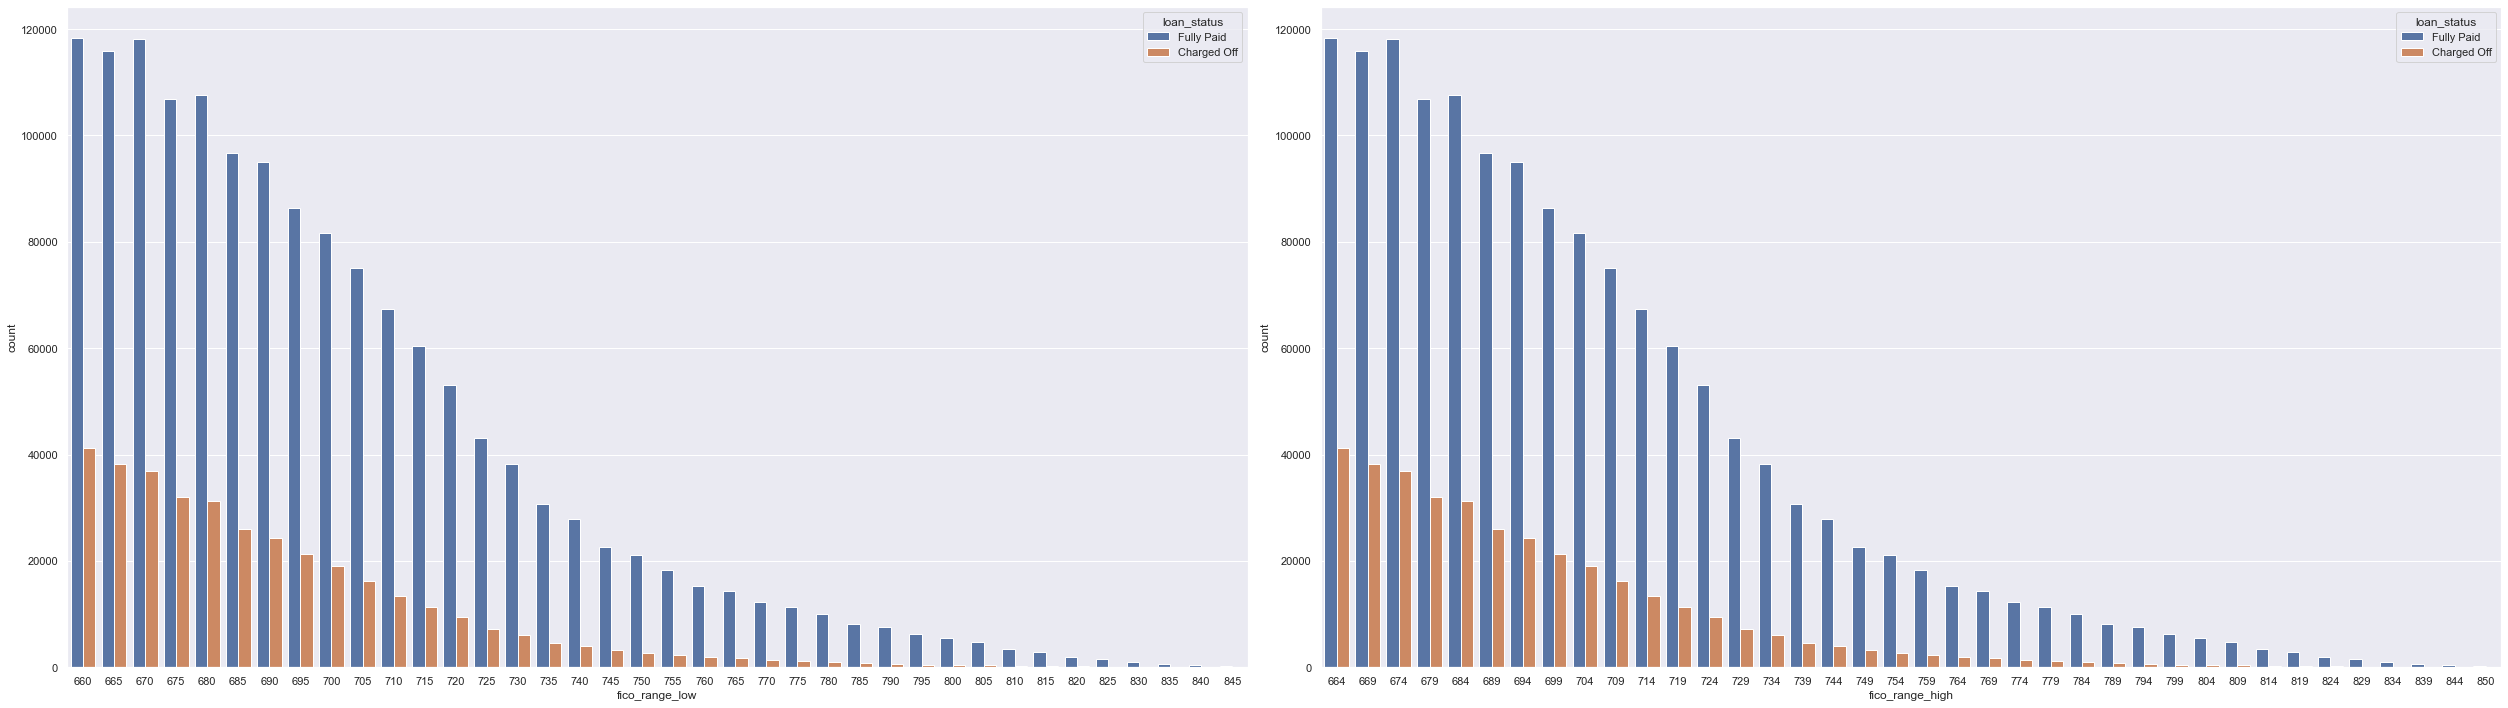

In [65]:
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = [35, 10]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(x='fico_range_low', data=df4, hue='loan_status', ax=axes[0])
sns.countplot(x='fico_range_high', data=df4, hue='loan_status', ax=axes[1])
plt.show()

In [66]:
df4['fico_avg'] = df4[['fico_range_low', 'fico_range_high']].mean(axis=1)
df4['fico_avg'] = df4['fico_avg'].astype('int64')
df4.head(3)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,year,fico_avg
0,5000.0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,2011.0,737
1,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,2011.0,742
2,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,2011.0,737


<AxesSubplot:xlabel='fico_avg', ylabel='count'>

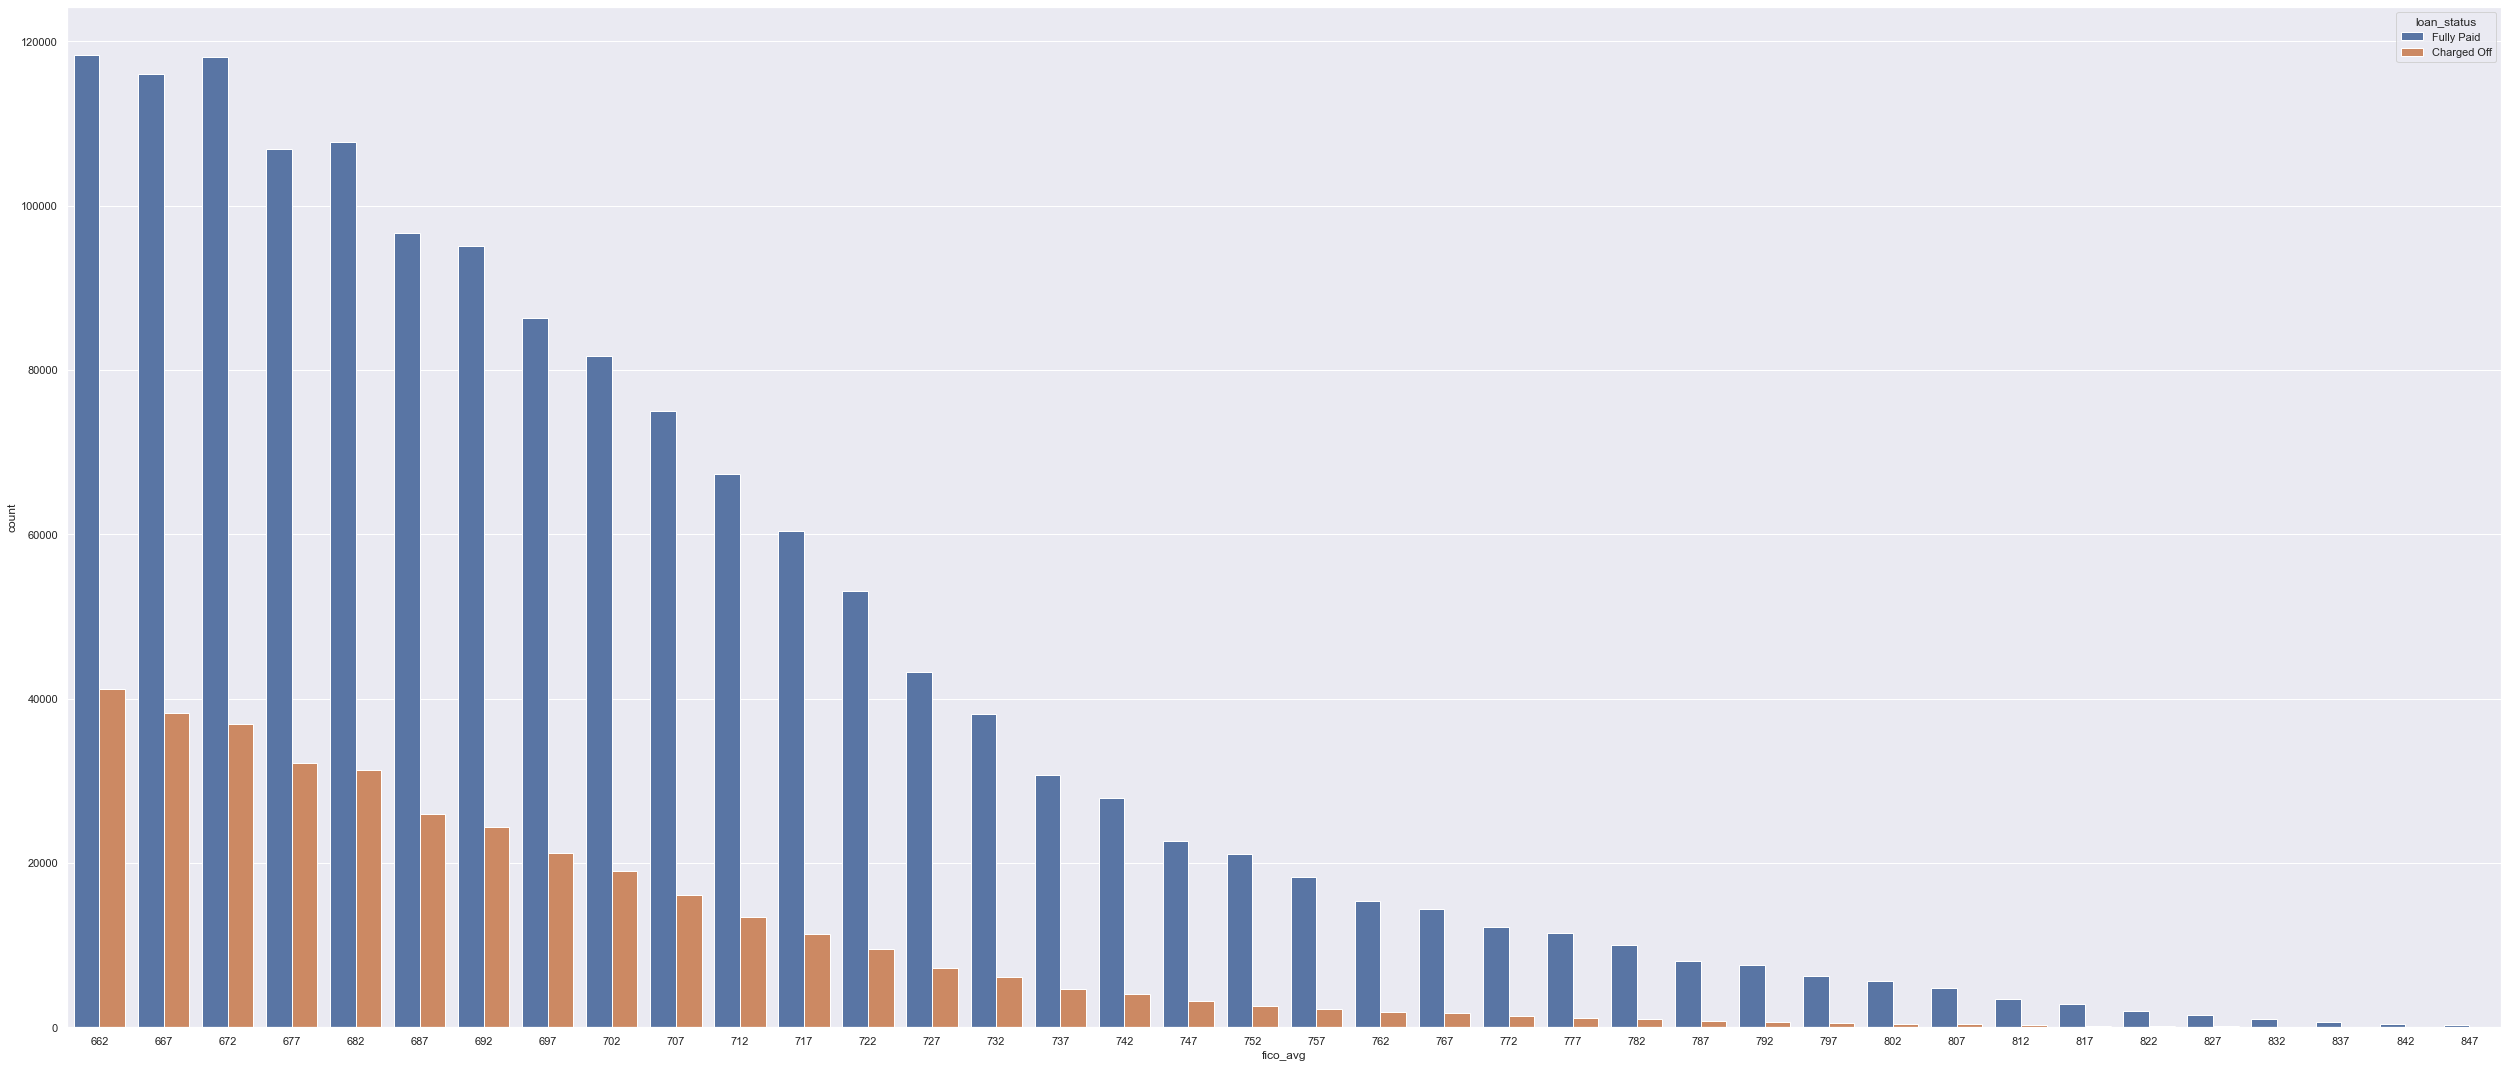

In [67]:
plt.figure(figsize=(35, 15))
sns.countplot(x='fico_avg', data=df4, hue='loan_status')

In [68]:
#tabela z procentowym udziałem pożyczek o rożnym statusie dla wskazanego wyniku fico
df_ficoa = df4.groupby('fico_avg')['loan_status'].value_counts(normalize=True)
df_ficoa = df_ficoa.mul(100)
df_ficoa = df_ficoa.rename('percent').reset_index()
df_ficoa.round(2).sort_values(['loan_status', 'percent'])

,fico_avg,loan_status,percent
61,812,Charged Off,6.36
71,837,Charged Off,6.74
67,827,Charged Off,7.04
55,797,Charged Off,7.19
63,817,Charged Off,7.26
...,...,...,...
62,817,Fully Paid,92.74
54,797,Fully Paid,92.81
66,827,Fully Paid,92.96
70,837,Fully Paid,93.26


In [69]:
#tabela zawierająca jedynie spłacone pożyczki
df_ficoa_paid = df_ficoa[df_ficoa['loan_status'] == "Fully Paid"]
df_ficoa_paid.head(3)

,fico_avg,loan_status,percent
0,662,Fully Paid,74.158987
2,667,Fully Paid,75.202646
4,672,Fully Paid,76.167835


In [70]:
#tabela zawierająca jedynie niespłacone pożyczki
df_ficoa_off = df_ficoa[df_ficoa['loan_status'] == "Charged Off"]
df_ficoa_off.head(3)

,fico_avg,loan_status,percent
1,662,Charged Off,25.841013
3,667,Charged Off,24.797354
5,672,Charged Off,23.832165


<AxesSubplot:xlabel='fico_avg'>

<Figure size 2520x1080 with 0 Axes>

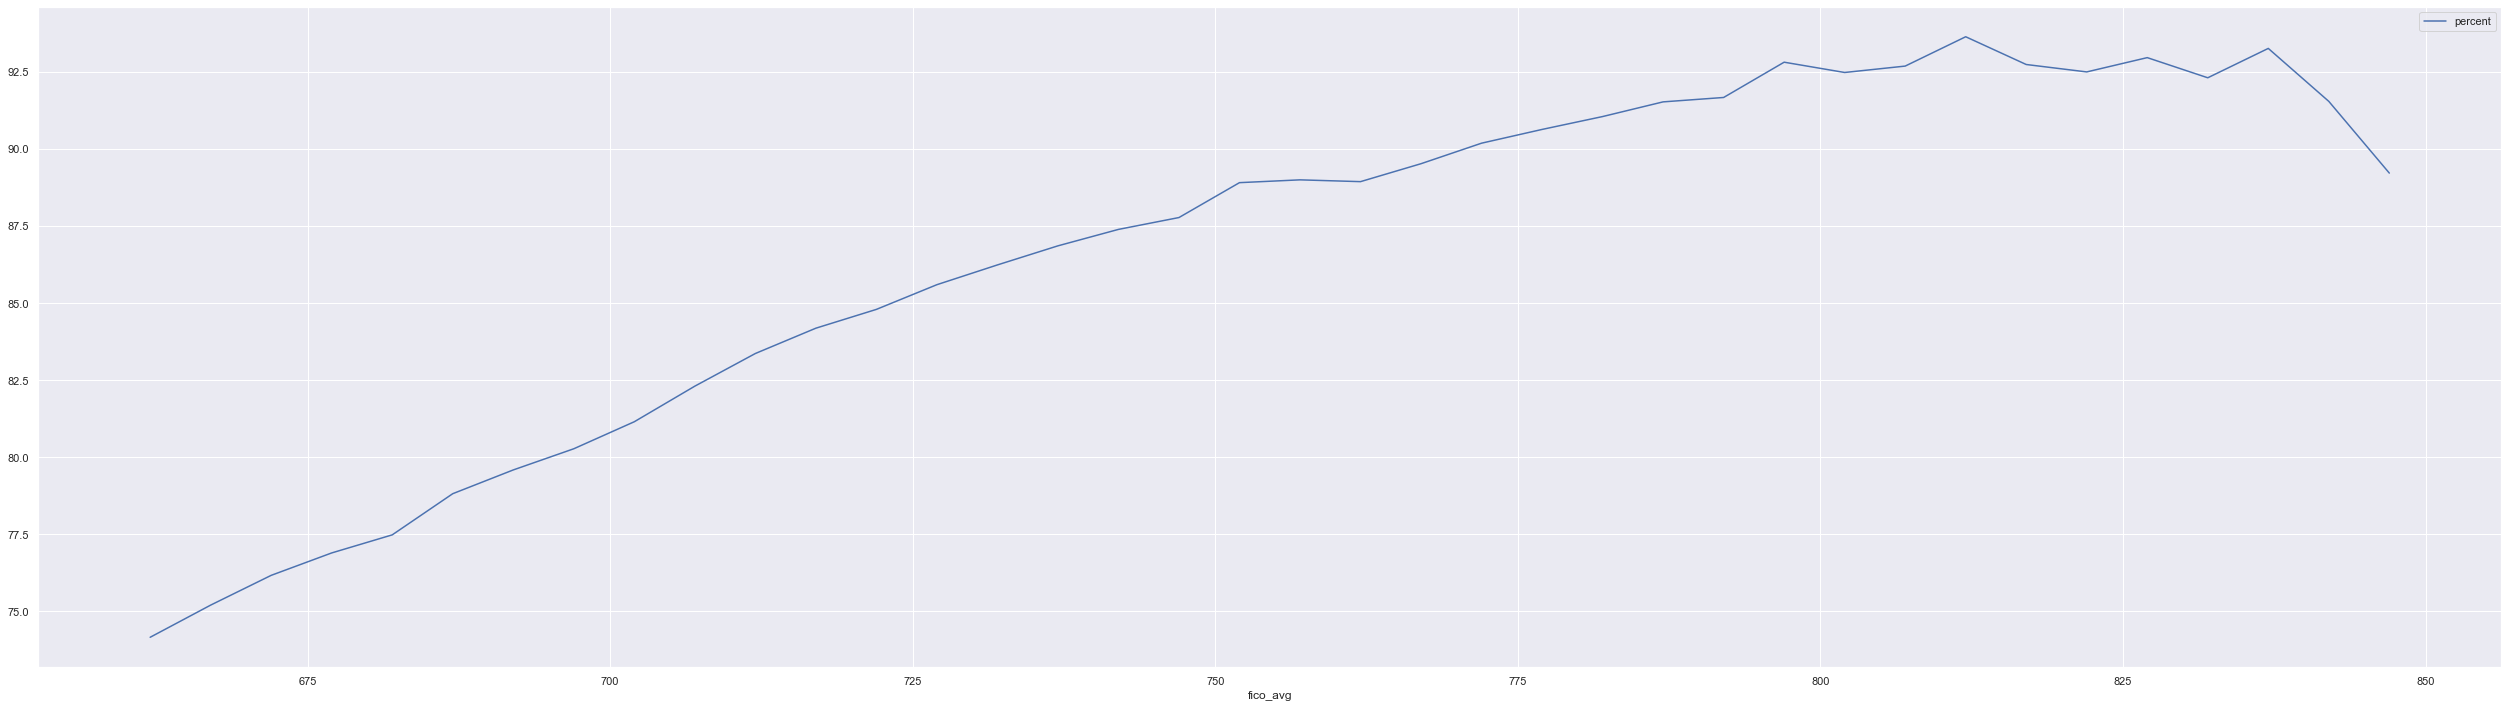

In [71]:
#procentowy udział w pełni spłaconych pożyczek w odniesieniu do wyniku fico
plt.figure(figsize=(35, 15))
df_ficoa_paid.plot(x='fico_avg', y='percent')

<AxesSubplot:xlabel='fico_avg'>

<Figure size 2520x1080 with 0 Axes>

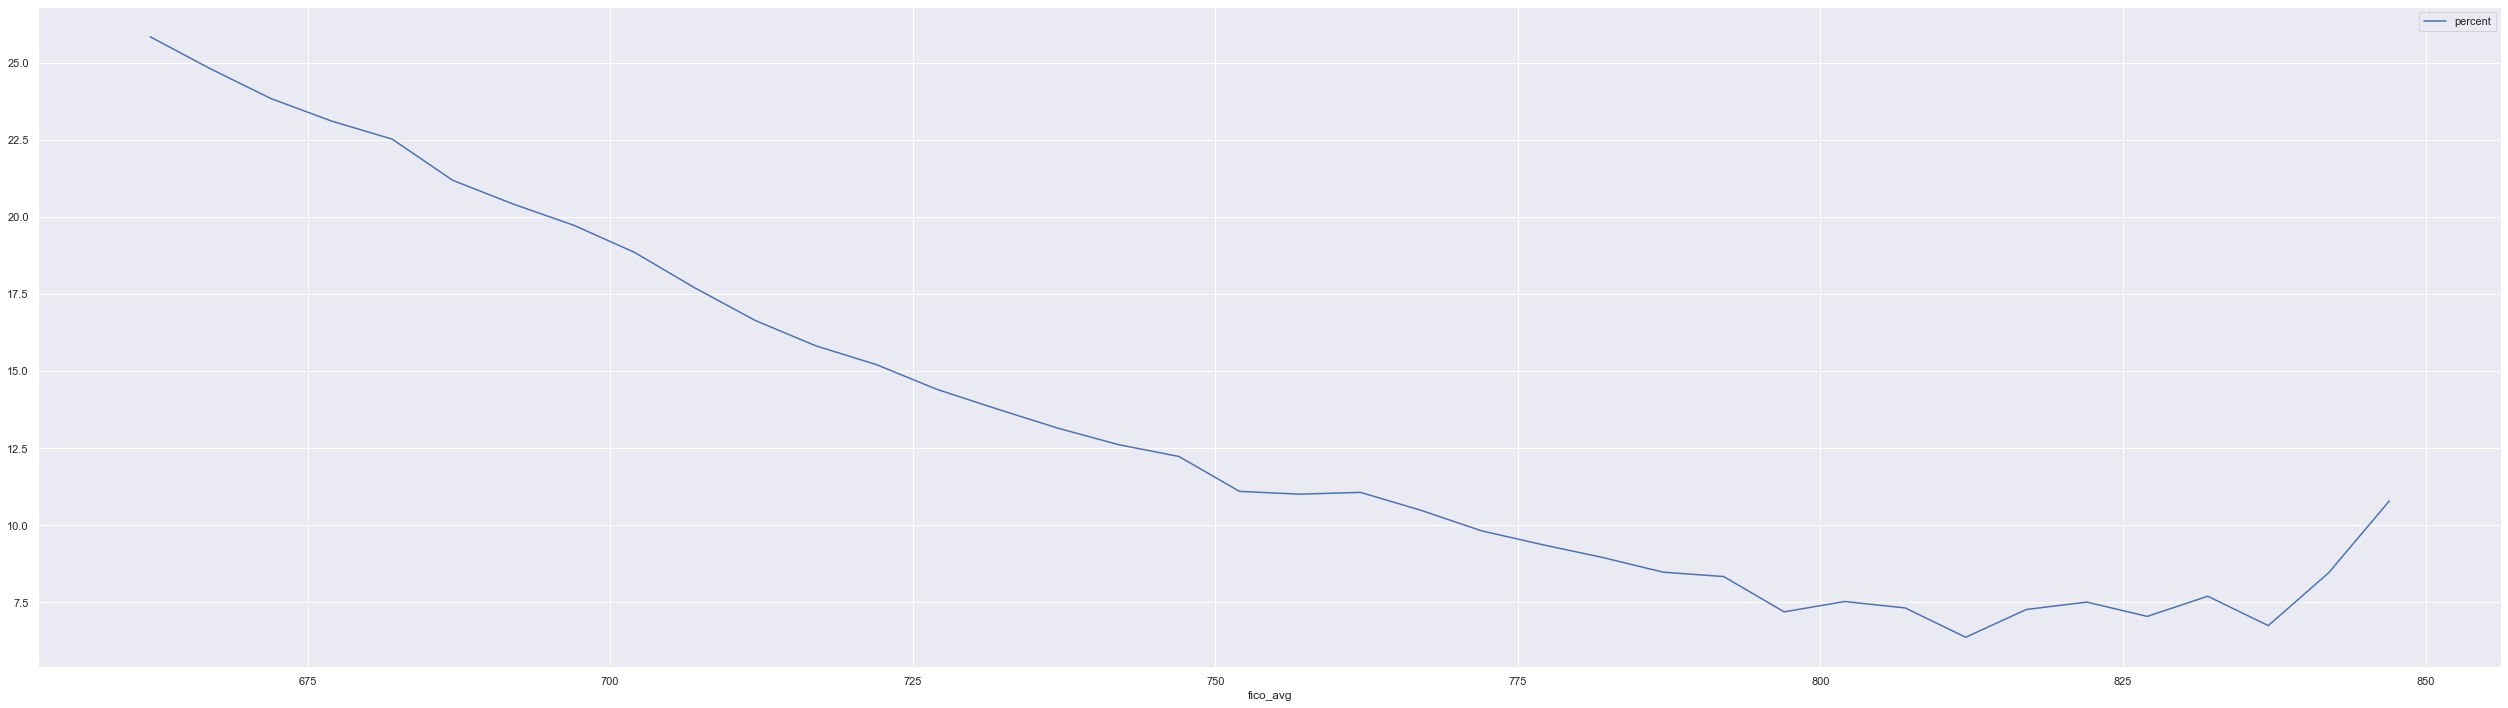

In [72]:
#procentowy udział niespłaconych pożyczek w odniesieniu do wyniku fico
plt.figure(figsize=(35, 15))
df_ficoa_off.plot(x='fico_avg', y='percent')

<AxesSubplot:xlabel='earliest_cr_line', ylabel='Count'>

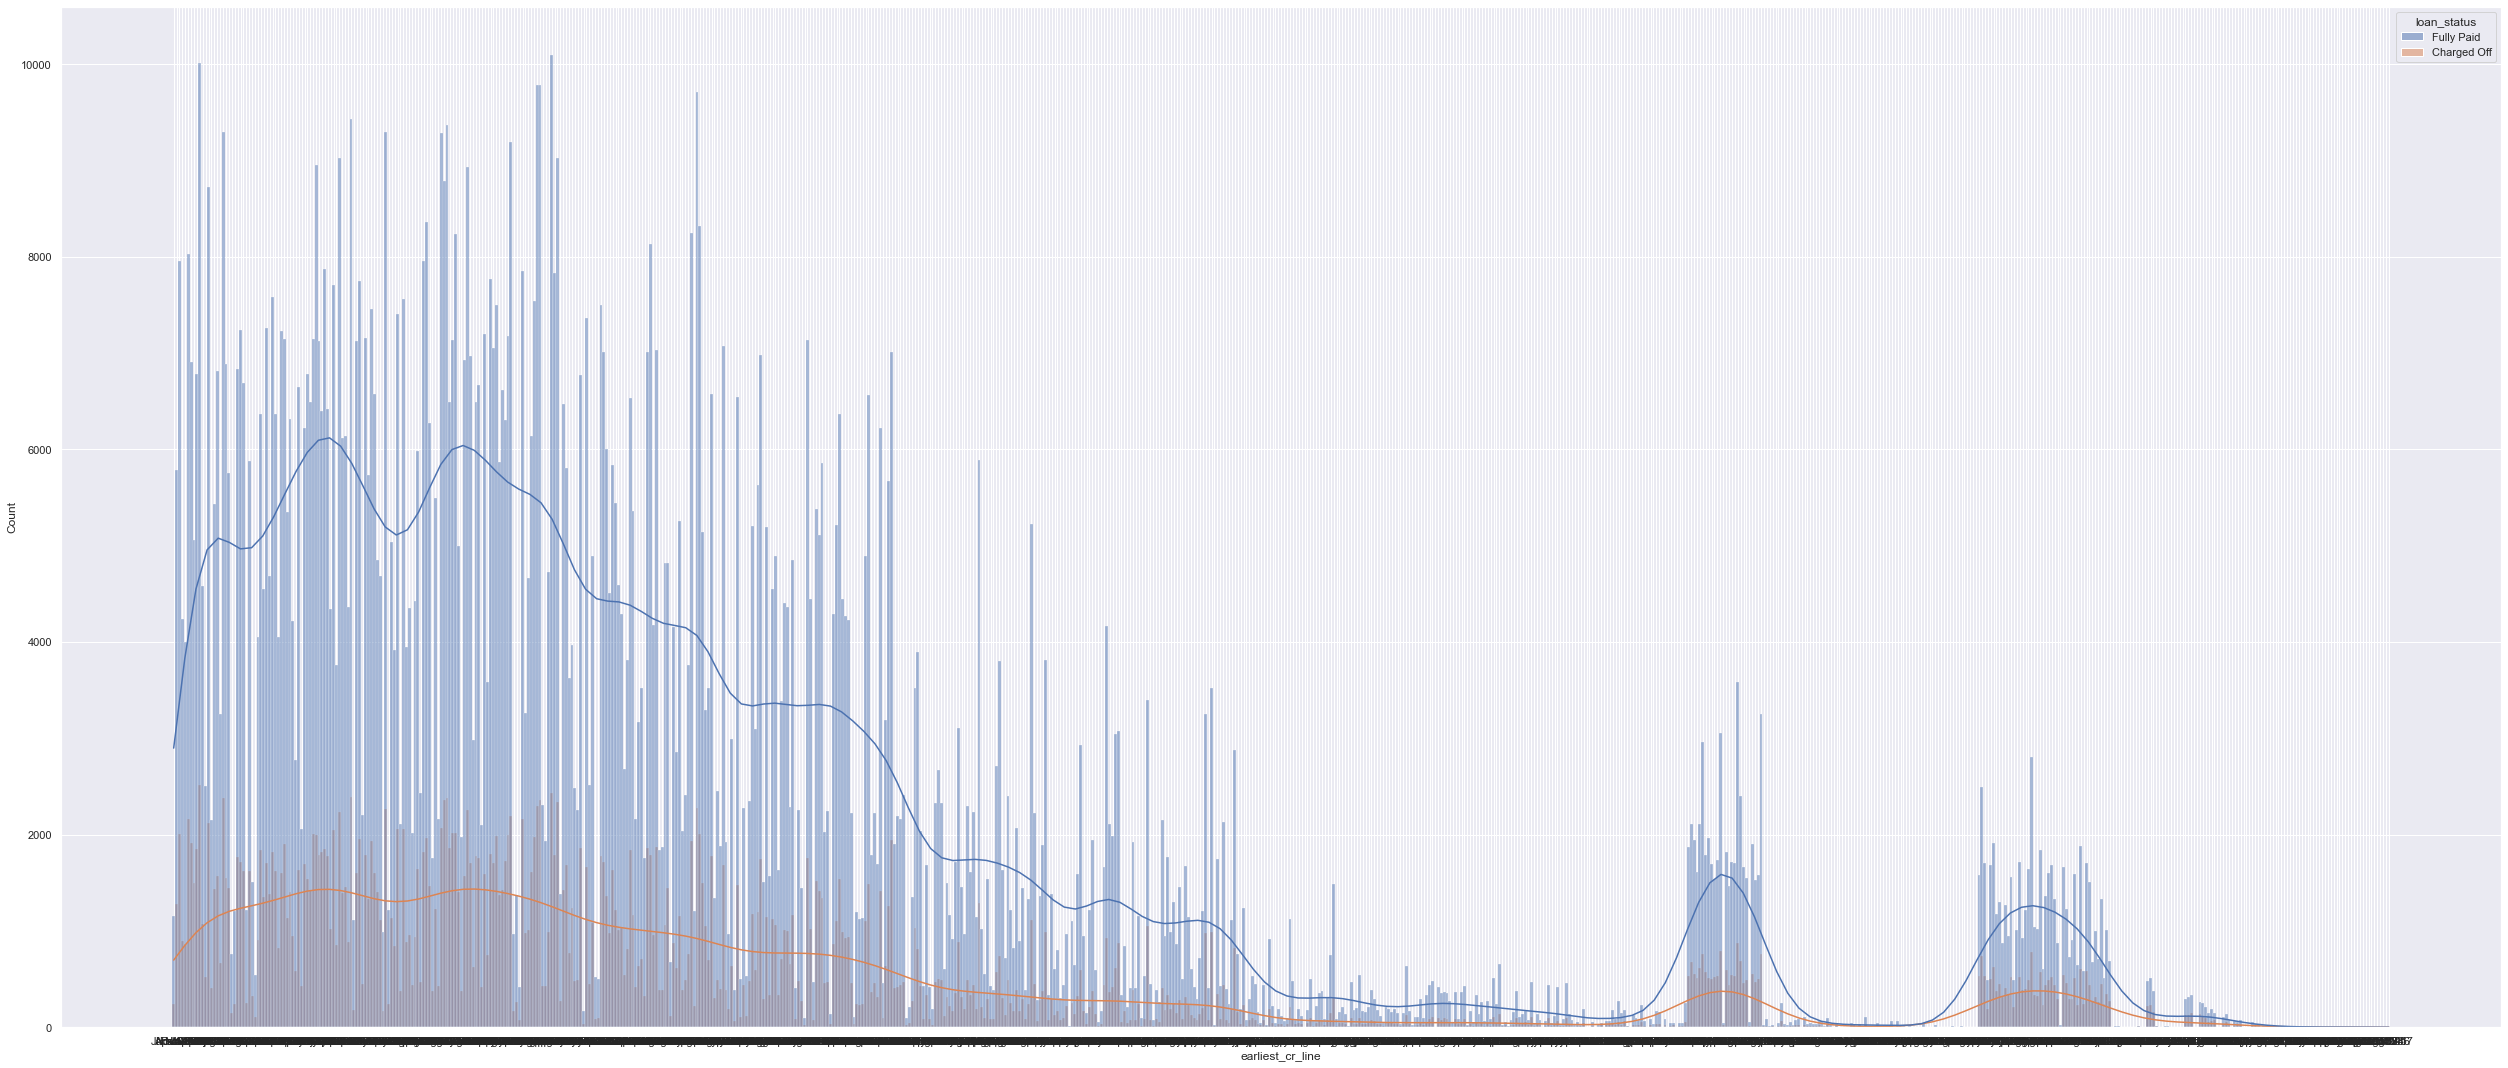

In [73]:
#W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania 
#i czy ryzyko to jest niezależne lub związane z wynikiem FICO

#zestawienie wieku kredytowego 'earliest_cr_line' ze statusem pożyczki
plt.figure(figsize=(35, 15))
sns.histplot(data=df4, x="earliest_cr_line", bins=30, kde=True, hue="loan_status")

<AxesSubplot:xlabel='earliest_cr_line', ylabel='Count'>

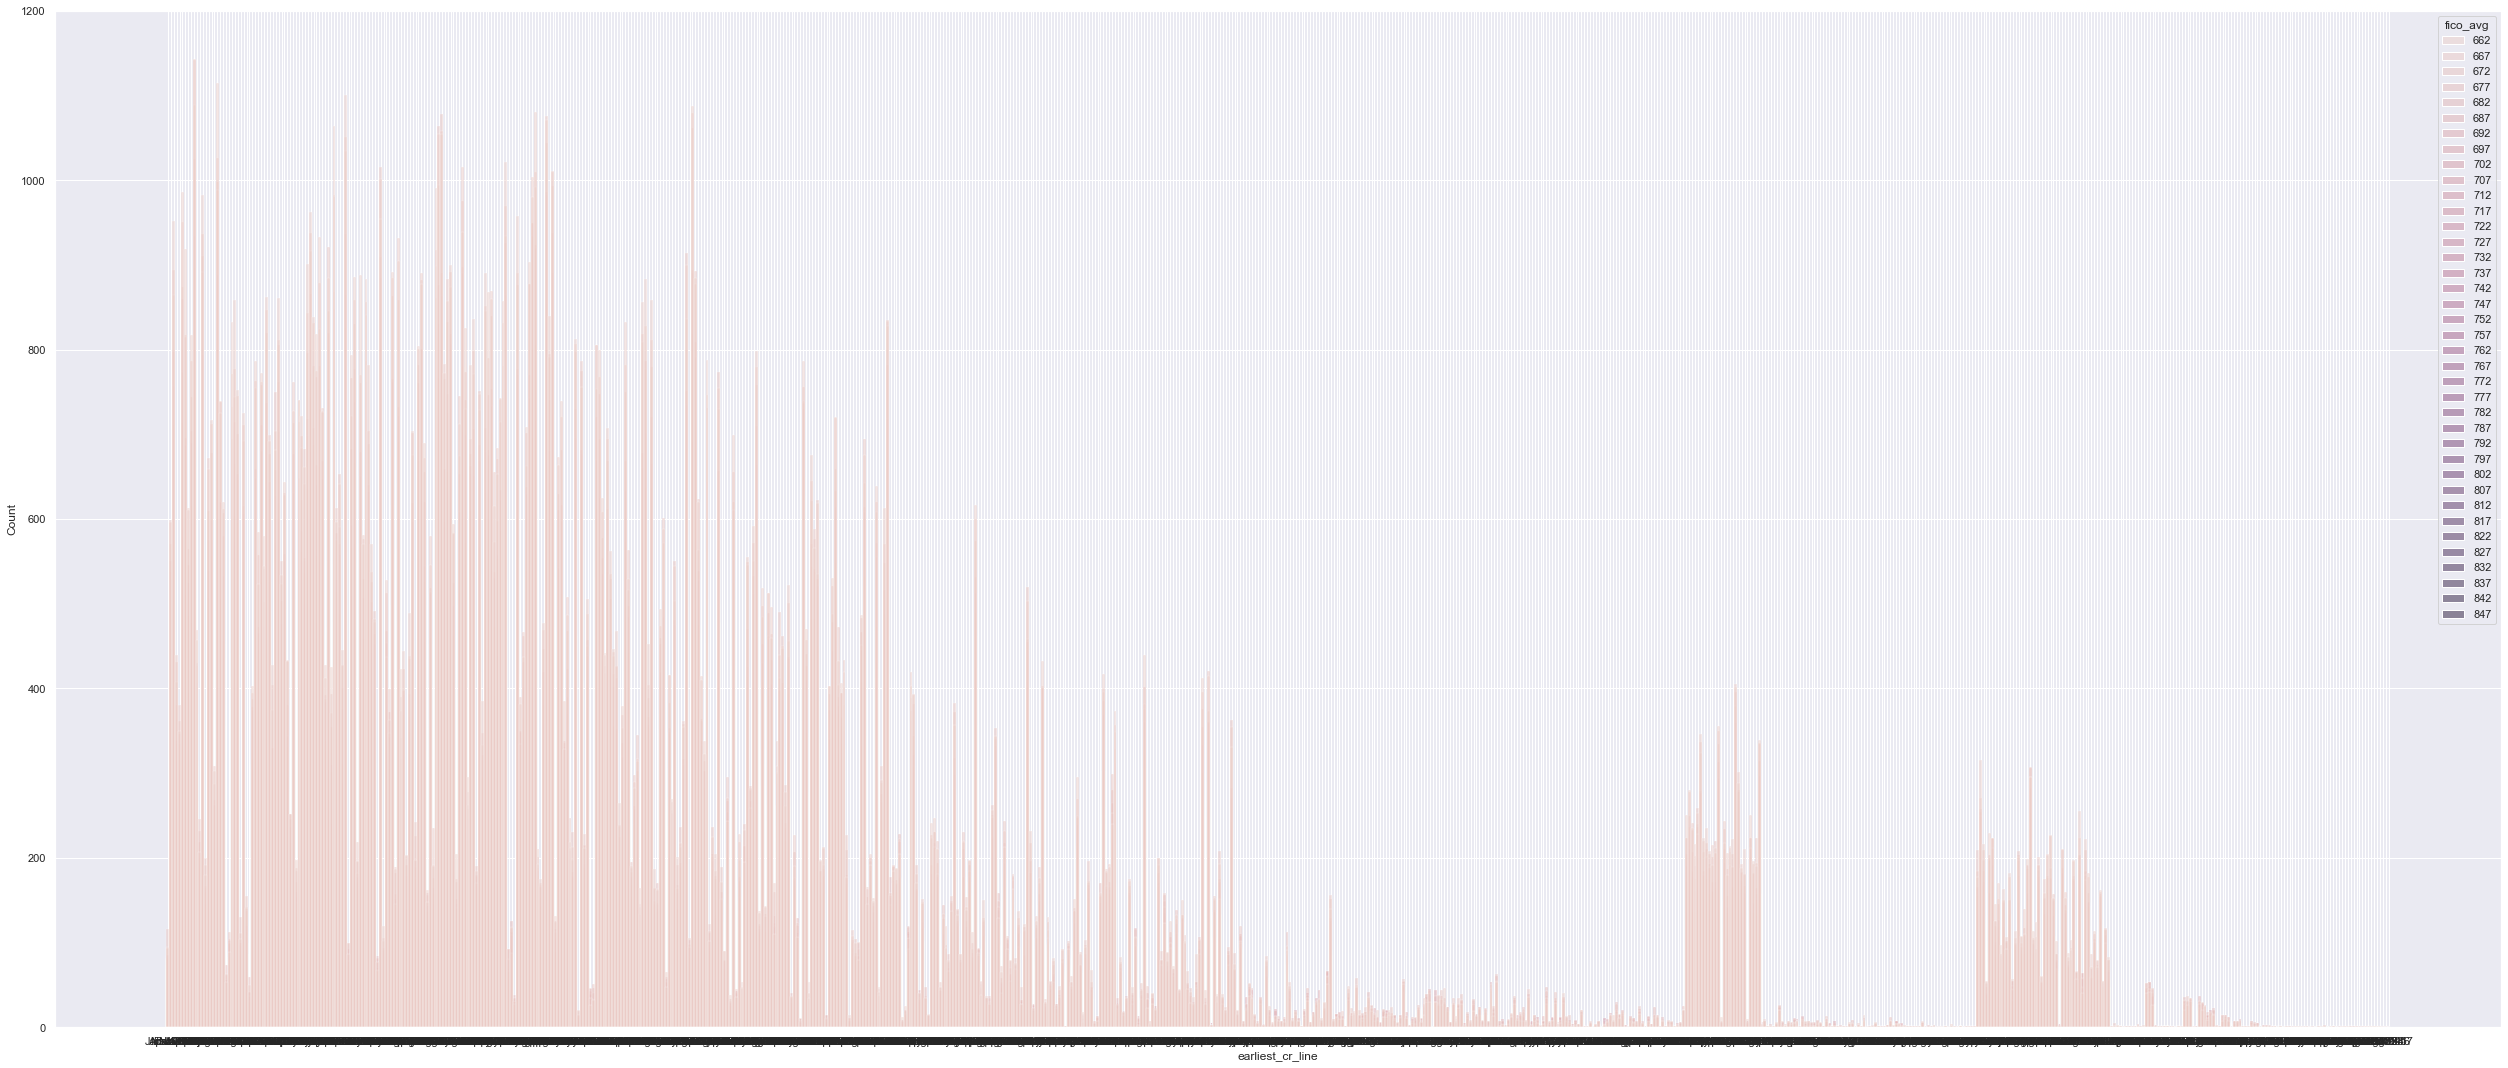

In [74]:
#zestawienie wieku kredytowego 'earliest_cr_line' ze średnim wynikiem FICO 'fico_avg'
plt.figure(figsize=(35, 15))
sns.histplot(data=df4, x="earliest_cr_line", bins=30, hue="fico_avg")

<AxesSubplot:xlabel='earliest_cr_line', ylabel='fico_avg'>

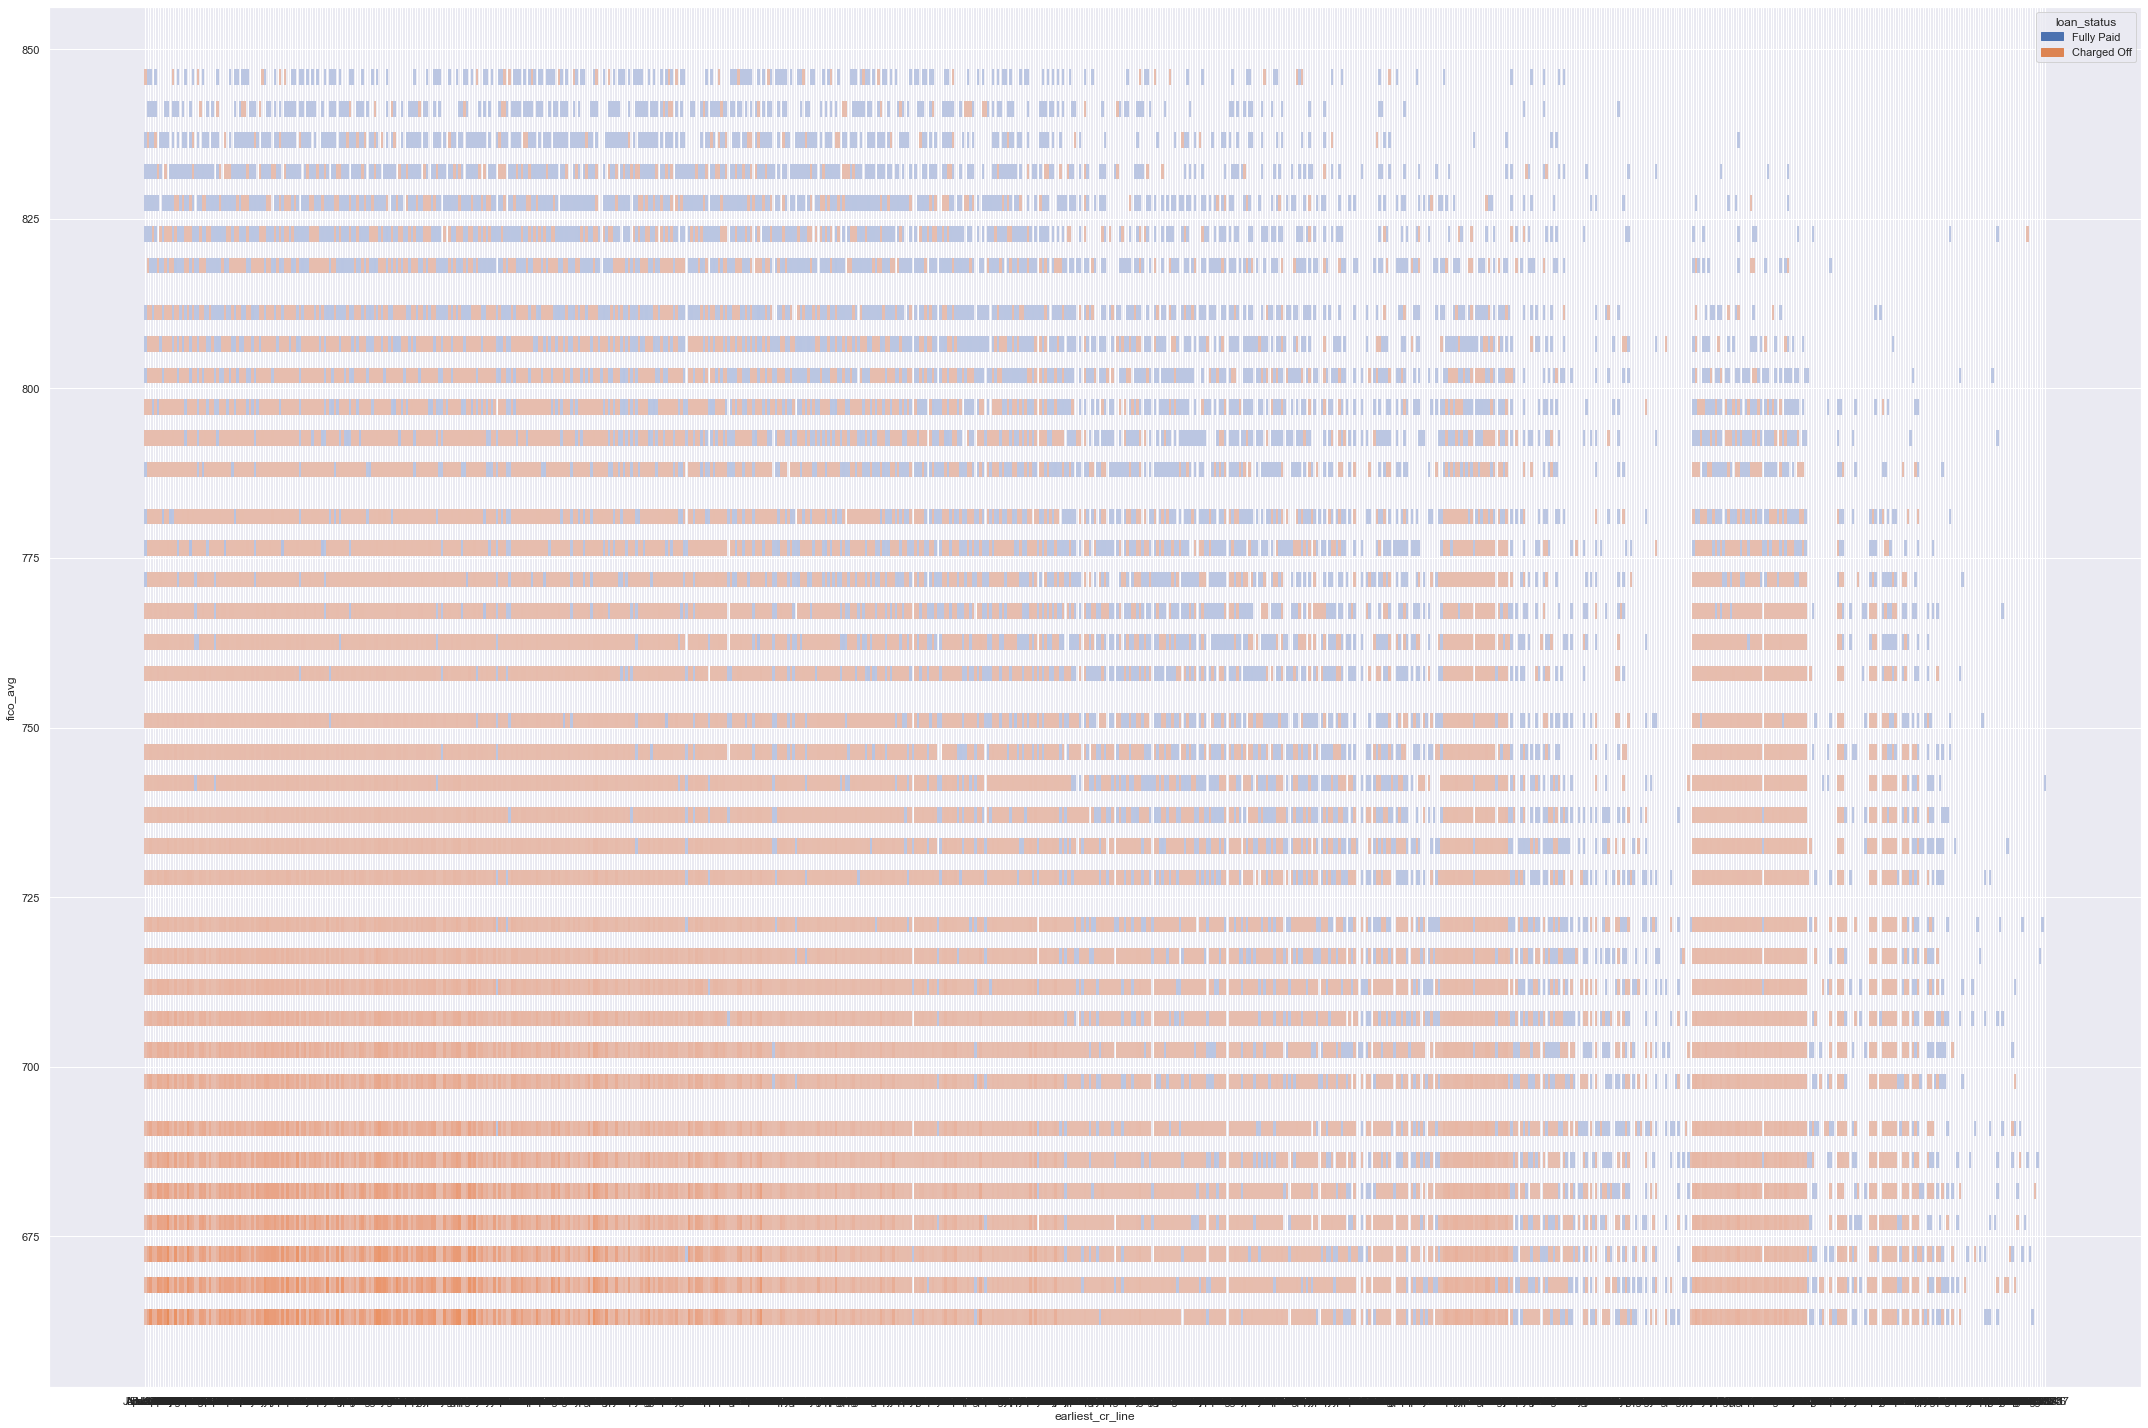

In [75]:
#histogram zawierający wszystkie trzy informacje 
plt.figure(figsize=(30, 20))
sns.histplot(data=df4, x='earliest_cr_line', y='fico_avg', bins=80, kde=True, hue='loan_status')

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

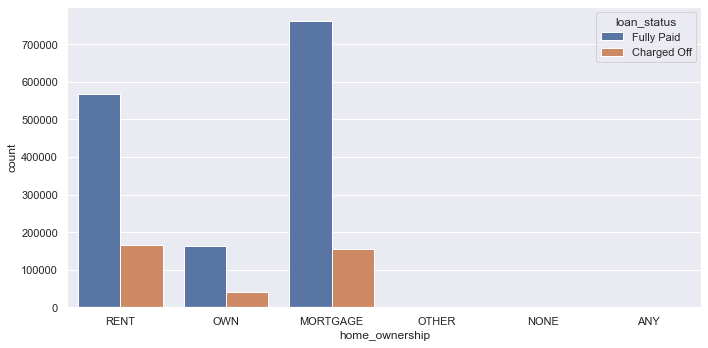

In [76]:
#status kredytu hipotecznego/status własności domu, a spłacalność
plt.figure(figsize=(10, 5))
sns.countplot(x='home_ownership', data=df4, hue='loan_status')

In [77]:
#rozkład procentowy pożyczek z pespektywy statusu
df_home = df4.groupby('home_ownership')['loan_status'].value_counts(normalize=True)
df_home = df_home.mul(100)
df_home = df_home.rename('percent').reset_index()
df_home.round(2).sort_values('home_ownership')

,home_ownership,loan_status,percent
0,ANY,Fully Paid,79.64
1,ANY,Charged Off,20.36
2,MORTGAGE,Fully Paid,83.16
3,MORTGAGE,Charged Off,16.84
4,NONE,Fully Paid,84.78
5,NONE,Charged Off,15.22
6,OTHER,Fully Paid,75.51
7,OTHER,Charged Off,24.49
8,OWN,Fully Paid,79.87
9,OWN,Charged Off,20.13


In [78]:
#roczny dochód 
df4.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).round(2)

count    1.853802e+06
mean     7.740416e+04
std      1.179694e+05
min      0.000000e+00
10%      3.400000e+04
25%      4.600000e+04
50%      6.500000e+04
75%      9.200000e+04
90%      1.292235e+05
max      1.100000e+08
Name: annual_inc, dtype: float64

In [79]:
#usunięcie outliersów z annual_inc
df5 = df4[np.abs(df4.annual_inc-df4.annual_inc.mean()) <= (3*df4.annual_inc.std())]

In [80]:
df5.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).round(2)

count    1849268.00
mean       75569.92
std        45163.63
min            0.00
10%        34000.00
25%        46000.00
50%        65000.00
75%        92000.00
90%       127000.00
max       431000.00
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

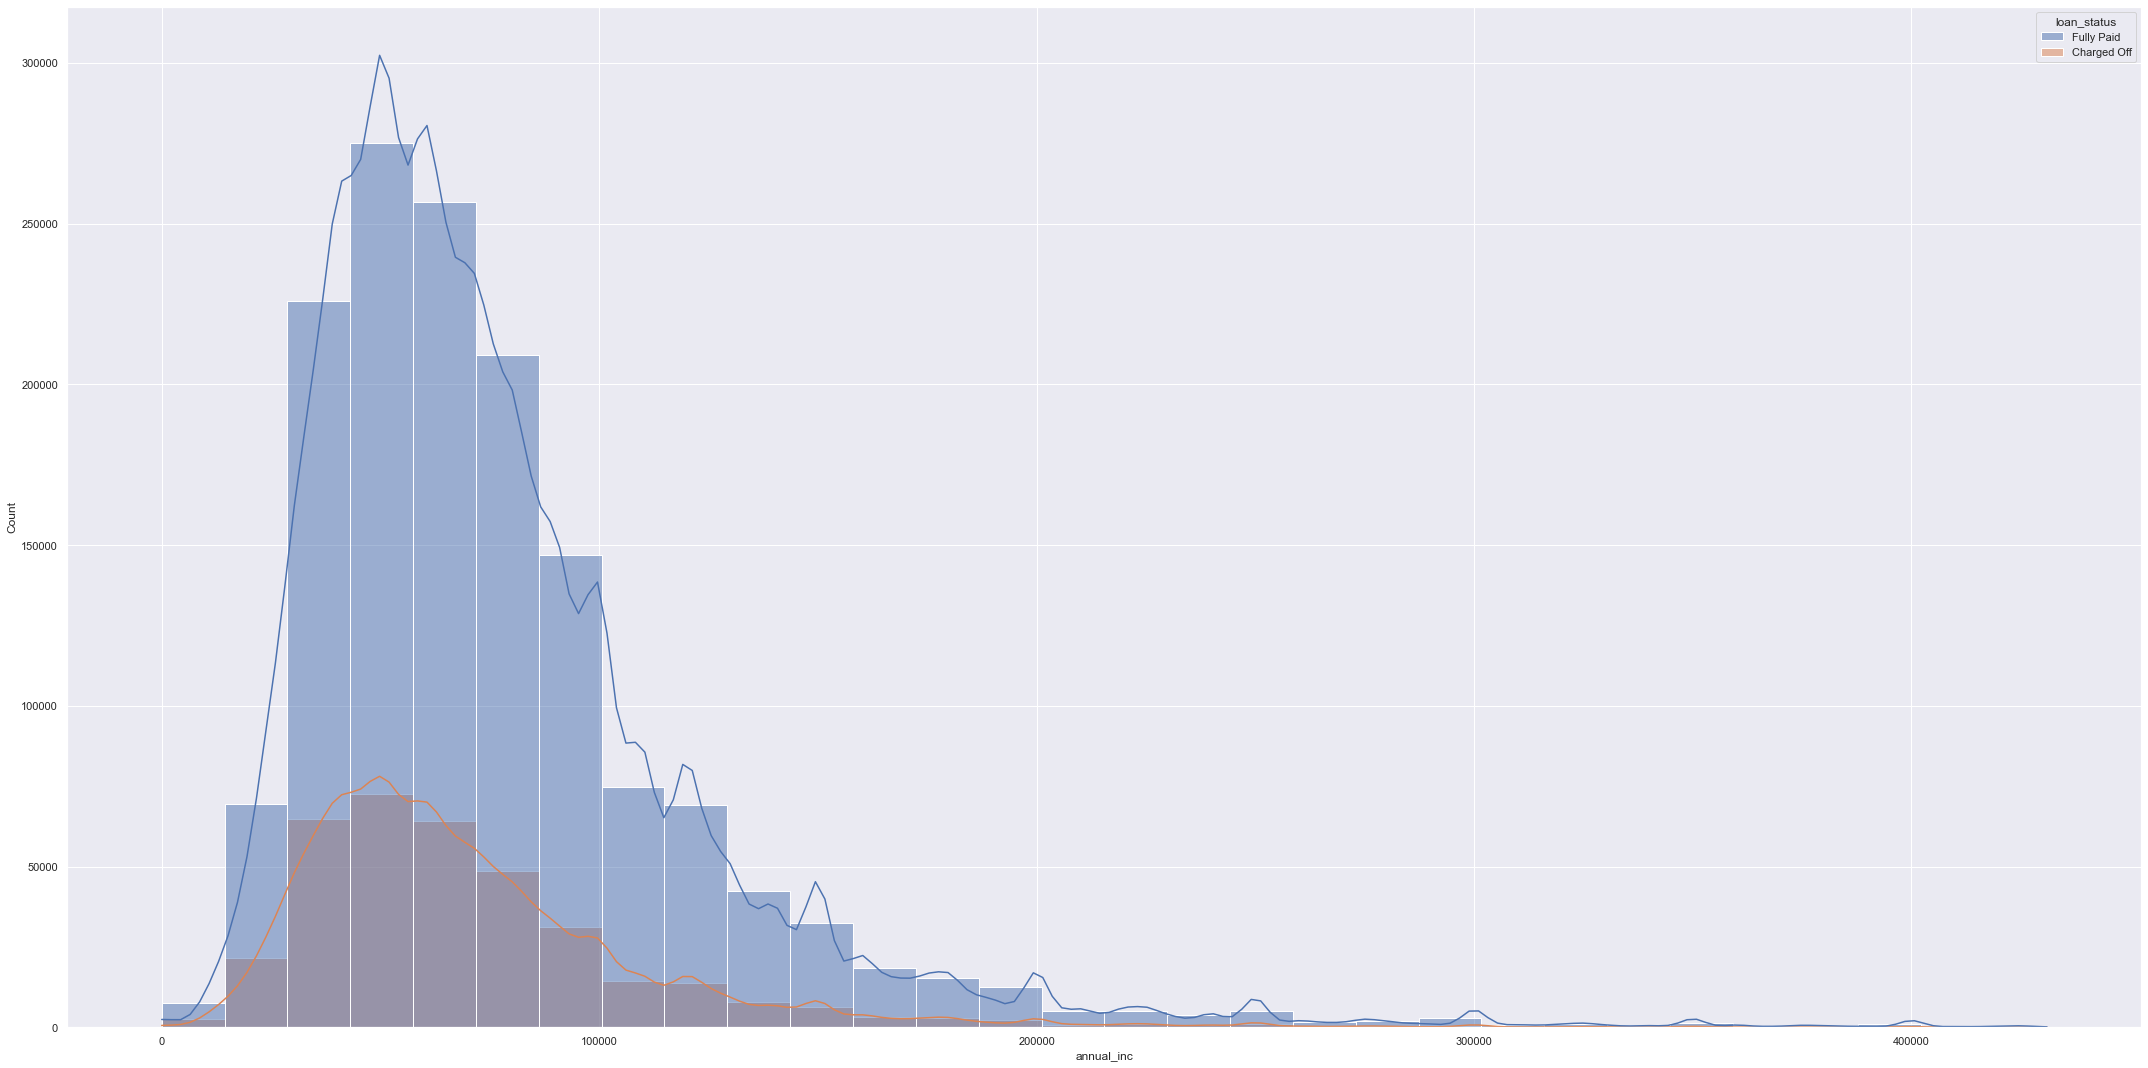

In [81]:
plt.figure(figsize=(30, 15))
sns.histplot(data=df5, x="annual_inc", bins=30, kde=True, hue="loan_status")